## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===

50000/50000 [==============================] - 8s 153us/step - loss: 1.6218 - accuracy: 0.5197 - val_loss: 1.6805 - val_accuracy: 0.4969
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6196 - accuracy: 0.5209 - val_loss: 1.6771 - val_accuracy: 0.4956
Epoch 49/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6153 - accuracy: 0.5208 - val_loss: 1.6558 - val_accuracy: 0.5056
Epoch 50/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6114 - accuracy: 0.5231 - val_loss: 1.7555 - val_accuracy: 0.4706
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________

Epoch 45/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.0901 - accuracy: 0.6674 - val_loss: 1.4947 - val_accuracy: 0.5333
Epoch 46/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.0781 - accuracy: 0.6718 - val_loss: 1.5584 - val_accuracy: 0.5140
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0664 - accuracy: 0.6761 - val_loss: 1.5154 - val_accuracy: 0.5361
Epoch 48/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0493 - accuracy: 0.6844 - val_loss: 1.5565 - val_accuracy: 0.5212
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0382 - accuracy: 0.6849 - val_loss: 1.6668 - val_accuracy: 0.5008
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0301 - accuracy: 0.6882 - val_loss: 1.5319 - val_accuracy: 0.5317
Experiment with Regulizer = 0.000000
Model: "model_1"
____________________________________________________

50000/50000 [==============================] - 7s 132us/step - loss: 0.9611 - accuracy: 0.6630 - val_loss: 1.4027 - val_accuracy: 0.5227
Epoch 43/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.9484 - accuracy: 0.6676 - val_loss: 1.4209 - val_accuracy: 0.5200
Epoch 44/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.9397 - accuracy: 0.6679 - val_loss: 1.4517 - val_accuracy: 0.5170
Epoch 45/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.9203 - accuracy: 0.6744 - val_loss: 1.5656 - val_accuracy: 0.4881
Epoch 46/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.9102 - accuracy: 0.6816 - val_loss: 1.3495 - val_accuracy: 0.5396
Epoch 47/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.9045 - accuracy: 0.6798 - val_loss: 1.4285 - val_accuracy: 0.5241
Epoch 48/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.8896 - accuracy: 0.6890 - val_loss:

Epoch 40/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.9765 - accuracy: 0.6591 - val_loss: 1.4958 - val_accuracy: 0.4931
Epoch 41/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9656 - accuracy: 0.6611 - val_loss: 1.3811 - val_accuracy: 0.5237
Epoch 42/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9551 - accuracy: 0.6650 - val_loss: 1.3909 - val_accuracy: 0.5298
Epoch 43/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9405 - accuracy: 0.6707 - val_loss: 1.3919 - val_accuracy: 0.5246
Epoch 44/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9329 - accuracy: 0.6720 - val_loss: 1.3847 - val_accuracy: 0.5253
Epoch 45/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9180 - accuracy: 0.6772 - val_loss: 1.3865 - val_accuracy: 0.5284
Epoch 46/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9061 - accuracy: 0.6820

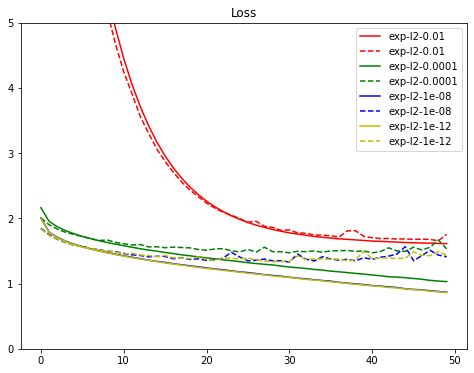

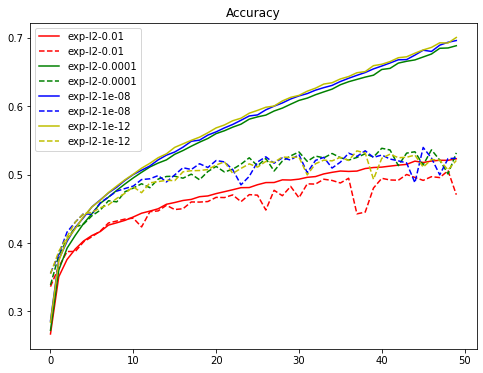

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 7s 136us/step - loss: 2.4626 - accuracy: 0.0956 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.4626 - accuracy: 0.0982 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.4626 - accuracy: 0.0972 - val_loss: 2.4624 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.7930 - accuracy: 0.6175 - val_loss: 3.0671 - val_accuracy: 0.5174
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.7547 - accuracy: 0.6191 - val_loss: 3.2596 - val_accuracy: 0.4771
Epoch 48/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.7192 - accuracy: 0.6192 - val_loss: 2.9531 - val_accuracy: 0.5341
Epoch 49/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.6754 - accuracy: 0.6255 - val_loss: 3.0300 - val_accuracy: 0.4998
Epoch 50/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.6436 - accuracy: 0.6222 - val_loss: 2.9138 - val_accuracy: 0.5242
Experiment with Regulizer = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

50000/50000 [==============================] - 7s 136us/step - loss: 0.9479 - accuracy: 0.6673 - val_loss: 1.3485 - val_accuracy: 0.5342
Epoch 44/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9366 - accuracy: 0.6726 - val_loss: 1.5773 - val_accuracy: 0.4807
Epoch 45/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9256 - accuracy: 0.6767 - val_loss: 1.4505 - val_accuracy: 0.5158
Epoch 46/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9110 - accuracy: 0.6810 - val_loss: 1.4118 - val_accuracy: 0.5247
Epoch 47/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.8972 - accuracy: 0.6855 - val_loss: 1.4045 - val_accuracy: 0.5261
Epoch 48/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.8849 - accuracy: 0.6908 - val_loss: 1.4559 - val_accuracy: 0.5186
Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.8767 - accuracy: 0.6919 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.9867 - accuracy: 0.6528 - val_loss: 1.4016 - val_accuracy: 0.5168
Epoch 42/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9814 - accuracy: 0.6550 - val_loss: 1.3601 - val_accuracy: 0.5278
Epoch 43/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9611 - accuracy: 0.6618 - val_loss: 1.4028 - val_accuracy: 0.5165
Epoch 44/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9451 - accuracy: 0.6652 - val_loss: 1.4260 - val_accuracy: 0.5182
Epoch 45/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.9348 - accuracy: 0.6729 - val_loss: 1.4642 - val_accuracy: 0.5149
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.9225 - accuracy: 0.6748 - val_loss: 1.3893 - val_accuracy: 0.5315
Epoch 47/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.9124 - accuracy: 0.678

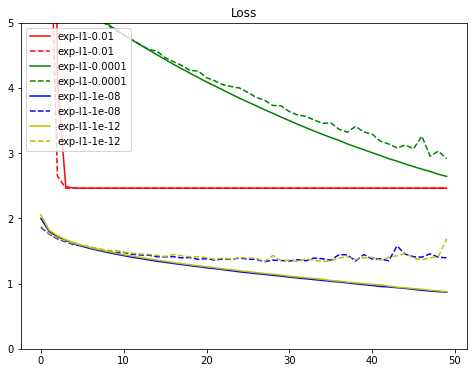

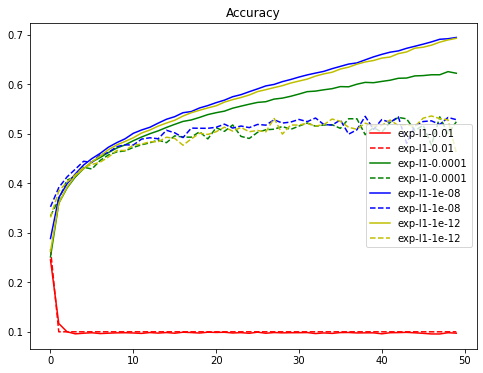

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()